In [1]:
import sys
sys.path.append('/home/hugo/PycharmProjects/routeplanner/src')

import osmnx as ox
import networkx as nx

import app_create
import traffic as tr

app = app_create.app_create()

with open('pm.xml') as xmlfile:
    tm_list = tr.parse_traffic_data(xmlfile.read(), debug=False)

app.update_traffic_info(tm_list)                            



2021-09-10 19:11:52 Configured OSMnx 1.1.1
2021-09-10 19:11:52 HTTP response caching is on
2021-09-10 19:11:58 Converting node, edge, and graph-level attribute data types
2021-09-10 19:12:00 Loaded graph with 41788 nodes and 82946 edges from "../data/madrid.gml"
2021-09-10 19:12:02 Created edges GeoDataFrame from graph


[19:12:04] ../src/executor/graph_executor.cc:1995: Subgraph backend MKLDNN is activated.


In [2]:
origin_point = (-3.6121729, 40.4524813)
destination_point = (-3.7090030, 40.4538682)



route, valid = app.get_route(origin_point, destination_point)

print(route)
print(valid)




2021-09-10 19:12:06 Created nodes GeoDataFrame from graph
2021-09-10 19:12:06 Created nodes GeoDataFrame from graph
[355517097, 351648656, 254203843, 251957427, 251956657, 251956661, 251956206, 5712160068, 251956204, 255658271, 251952070, 21716284, 21716286, 21716281, 31053285, 31053284, 31053276, 392310166, 88976448, 29795710, 30097679, 29795744, 29795784, 29795770, 29795750, 29795752, 29795749, 29795715, 29795712, 29795692, 29795812, 88976599, 88976523, 31053275, 21716263, 2063690213, 2063690214, 2063690206, 2063690200, 2063690209, 506891608, 560811351, 571432744, 255163388, 30097698, 30097697, 30097696, 29795727, 29795729, 255163653, 29795725, 255163720, 29795722, 31066966, 29795837, 3642316893, 2208138773, 31146526, 2208138765, 29795832, 88976867, 88976906, 2208138760, 2208138756, 2208138754, 2208138747, 2208138744, 2208138743, 2208138742, 4827268314, 64944202, 313152873, 64944203, 6329079859, 64944206, 64944207, 2500065527, 31107303, 3682123514, 31107301, 31107294, 31107200, 64947

2021-09-10 19:12:33 Created nodes GeoDataFrame from graph
2021-09-10 19:12:33 Created nodes GeoDataFrame from graph
98733244
[355517097, 355517122, 251956204, 255658271, 571465332, 251952414, 1251169587, 1251169260, 251954247, 249836810, 251564332, 355234804, 21527020, 1890257861, 25926130, 1915440303, 335670463, 335670510, 149025359, 1447129040, 26595706, 2693214181, 3489739896, 26595718, 148889926, 148891407, 1505106140, 29803002, 1505106155, 143667392, 143664072, 142262280, 3293613549, 1505081140, 981649999, 142256711, 2506590865, 3135450430, 142194318, 98746807, 98746258, 875774476, 81580408, 142246030, 32602934, 3802946125, 32604462, 98727478, 8398453283, 8398453282, 98727885, 98727994, 98727957, 98725384, 98722464, 98722463, 98728208, 98722462, 98722461, 98733274, 98733244]
2021-09-10 19:12:34 Begin plotting the graph...
2021-09-10 19:12:39 Created edges GeoDataFrame from graph
2021-09-10 19:12:47 Finished plotting the graph


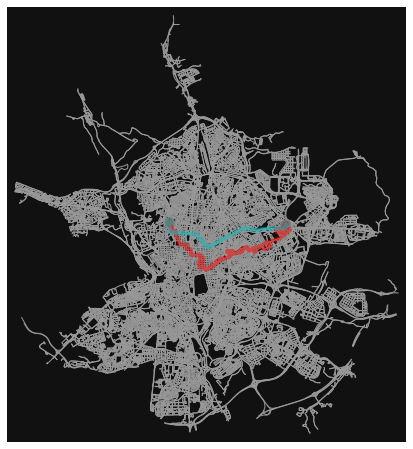

In [3]:
G = app.graph
node_src = ox.distance.nearest_nodes(G, origin_point[0], origin_point[1])
node_dst = ox.distance.nearest_nodes(G, destination_point[0], destination_point[1])
route2 = nx.shortest_path(G, node_src, node_dst, weight='weight')

print(node_dst)
print(route2)

routes = [route, route2]
rc = ['r', 'c']
fig, ax = ox.plot_graph_routes(G, routes, route_colors=rc, route_linewidth=6, node_size=0)